In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Multiplication

In [2]:
sess = tf.Session()
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
y = tf.multiply(a, b)
print("{:.1f} should equal 2.0".format(sess.run(y, feed_dict={a: 1, b: 2})))
print("{:.1f} should equal 9.0".format(sess.run(y, feed_dict={a: 3, b: 3})))

2.0 should equal 2.0
9.0 should equal 9.0


# Simple Linear Regression

## Training data Generation

In [3]:
num_sample = 20
X_trn = np.linspace(0, 1, num_sample)
Weight = 2
Bias = -1.0
noise_level = 0.1
Y_true = X_trn * Weight + Bias
Y_trn = Y_true + np.random.randn(*X_trn.shape) * noise_level

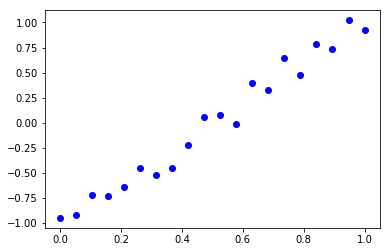

In [4]:
plt.figure(1)
# plt.plot(X_trn, Y_true, "ro", label = "True data")
plt.plot(X_trn, Y_trn, "bo", label = "Training data")
plt.show()

## 모델 만들기

In [5]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(0.0)
b = tf.Variable(0.0)
Y_model = tf.multiply(X, W) + b

## Loss function 만들기

In [6]:
# Mean Squeared Error (MSE)
loss = tf.reduce_mean(tf.square(Y - Y_model))

## training Optimizer 만들기

In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

In [8]:
sess.run(tf.global_variables_initializer())
for i in range(1000):
    sess.run(train_op, feed_dict={X: X_trn, Y: Y_trn})
    if i % 100 == 0:
        print("Weight: {:0.4f}, Bias: {:0.4f}".format(*sess.run([W, b])))
        print("loss: {:0.4f}".format(sess.run(loss, feed_dict={X: X_trn, Y: Y_trn})))

Weight: 0.0370, Bias: -0.0014
loss: 0.3821
Weight: 1.5841, Bias: -0.7811
loss: 0.0302
Weight: 1.9376, Bias: -0.9717
loss: 0.0114
Weight: 2.0195, Bias: -1.0159
loss: 0.0104
Weight: 2.0385, Bias: -1.0261
loss: 0.0104
Weight: 2.0429, Bias: -1.0285
loss: 0.0104
Weight: 2.0440, Bias: -1.0290
loss: 0.0104
Weight: 2.0442, Bias: -1.0292
loss: 0.0104
Weight: 2.0442, Bias: -1.0292
loss: 0.0104
Weight: 2.0443, Bias: -1.0292
loss: 0.0104


In [9]:
W, b = sess.run([W, b])

In [10]:
sess.close()

In [11]:
type(W)

numpy.float32

In [12]:
Y_pred = np.dot(X_trn, W) + b

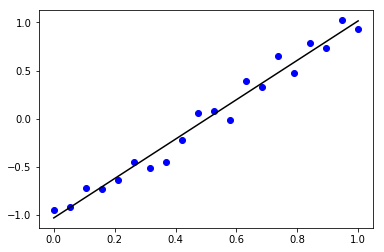

In [13]:
plt.figure(1)
# plt.plot(X_trn, Y_true, "ro", label = "True data")
plt.plot(X_trn, Y_trn, "bo", label = "Training data")
plt.plot(X_trn, Y_pred, "k-", label = "Prediction")
plt.show()